# Proyecto: Detección de patrones en una serie de datos mediante Regresión No Lineal usando Deep Neural Networks

In [1]:
import pandas as pd 

import matplotlib.pyplot as plt

import numpy as np

# Librería para separar datos:
from sklearn.model_selection import train_test_split

# importamos funciones para construir redes neuronales:
from tensorflow.keras import layers, models, optimizers, regularizers

## Cargamos y Exploramos datos:

In [2]:
# Cargamos dataset:
df = pd.read_csv('./Data/non_lin_data_1D.csv')
df

,features,labels
0,0,10.615287
1,1,10.411820
2,2,8.976248
3,3,9.982681
4,4,8.483438
...,...,...
995,995,5.211010
996,996,6.556664
997,997,6.617752
998,998,6.885325


<Figure size 432x288 with 0 Axes>

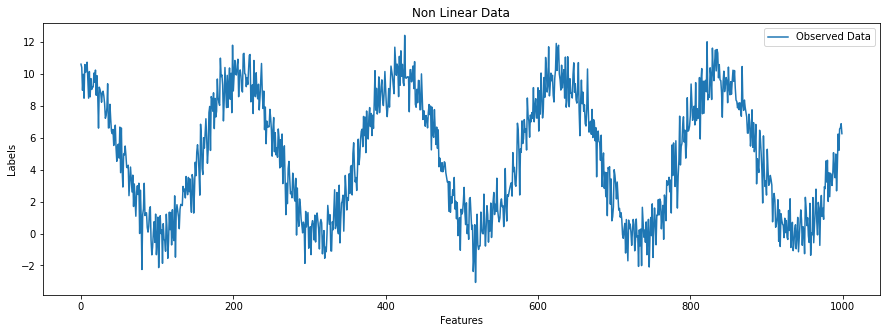

In [3]:
# Graficamos los datos:
plt.figure()
plt.figure( figsize=(15,5) )

plt.plot( df['features'] , df['labels'] , label='Observed Data')
plt.xlabel('Features')
plt.ylabel('Labels')
plt.title('Non Linear Data')
plt.legend()

plt.show()

## Estandarizamos features

In [4]:
# Extraemos los features:
x_features = df['features'].values

x_mean = x_features.mean()
x_std = x_features.std()

# Estandarizamos features para pasarlos por la red:
x_features = (x_features - x_mean)/x_std

In [5]:
# Verificamos que los features estén estandarizados:
print('features_mean =', np.round( x_features.mean() ) )
print('features_std =',  np.round( x_features.std() ) )

# Cuando los features son de varias variables, estandarizamos variable por variable (ie. columna por columna)

features_mean = 0.0
features_std = 1.0


## Redimensionamos features como vector columna para pasarlos por la red

In [6]:
x_features.shape

(1000,)

In [7]:
# Redimensionamos features como vector columna para pasarlos por la red:
x_features = x_features.reshape( x_features.shape[0],1 )
x_features.shape

(1000, 1)

In [8]:
# Extraemos labels:
y_labels = df['labels'].values
y_labels.shape

(1000,)

## Separamos datos para entrenamiento, validación y pruebas:

In [9]:
# Particionamos datos en entrenamiento, validacion y pruebas como sigue:

# |************************|oooooo| <-- 100%
# **** <-- Train 70%
# oooo <-- Test 30 %

# |*****************|++++++| <-- 100%
# **** <-- Train part 70%
# ++++ <-- Validation 30 %



p_train=0.8  # porcentaje para datos de entrenamiento
p_test = 0.2 # porcentaje para datos de prueba

x_train_partial, x_test , y_train_partial, y_test = train_test_split ( x_features , y_labels , train_size=p_train , test_size=p_test)

# =====================================================================
# Volvemos a particionar los datos de entrenamiento para extraer datos de validación:
p_train=0.9  # porcentaje para datos de entrenamiento
p_val = 0.1 # porcentaje para datos de validación

x_train, x_val , y_train, y_val = train_test_split ( x_train_partial , y_train_partial , train_size=p_train , test_size=p_val)

print('x_train.shape = ',x_train.shape)
print('x_val.shape = ',x_val.shape)
print('x_test.shape = ',x_test.shape)

x_train.shape =  (720, 1)
x_val.shape =  (80, 1)
x_test.shape =  (200, 1)


In [10]:
# Extraemos dimensión de cada feature para entrenar la red:
dim_feature = x_train[0].shape
dim_feature

(1,)

## Construimos la red neuronal dentro de una función:

In [11]:
# Construimos la red dentro de una función:

# Parametros de entrada: 'dimension del feature' y 'learning rate'
def build_model( dim_feature , lr ):

    # numero de neuronas en cada capa:
    nn = 50 

    # Construimos arquitectura de la red:
    model = models.Sequential()
    # Capa 1 (entrada)
    model.add( layers.Dense(nn, activation='relu', input_shape=dim_feature ))
    # Capa 2
    model.add( layers.Dense(nn, activation='relu' ))
    # Capa 3
    model.add( layers.Dense(nn, activation='relu' ))
    # Capa 4
    model.add( layers.Dense(nn, activation='relu' ))
    # Capa 5
    model.add( layers.Dense(nn, activation='relu' ))
    # Capa 6    
    model.add( layers.Dense(nn, activation='relu' ))
    # Capa 7
    model.add( layers.Dense(nn, activation='relu' ))
    # Capa 8
    #model.add( layers.Dense(nn, activation='relu' ))
    # Capa 9
    #model.add( layers.Dense(nn, activation='relu' ))
    # Capa 10
    #model.add( layers.Dense(nn, activation='relu' ))
    
    # Capa de salida (una sóla neurona sin función de activación para problemas de regresión)
    model.add( layers.Dense(1) )

    # visualzamos la arquitecura de la red:
    # model.summary()

    # optimizador:
    optim_meth = optimizers.Nadam(learning_rate=lr)

    # compilamos la red:
    model.compile(
        optimizer= optim_meth,
        loss='mse',  # <-- Función de costo a minimizar: mean square error (para problemas de regresión)
        metrics='mae'# <-- Métrica para evaluar entrenamiento: mean absolute error
        )

    return model

In [12]:
# ================= Parámetros que controlan la convergencia de la red =====================

# learning rate:
lr = 0.001

n_epochs = 300

n_batch_size = round(0.2*x_train.shape[0])
n_batch_size
# ===========================================================================================

144

## Declaramos la red y la entrenamos:

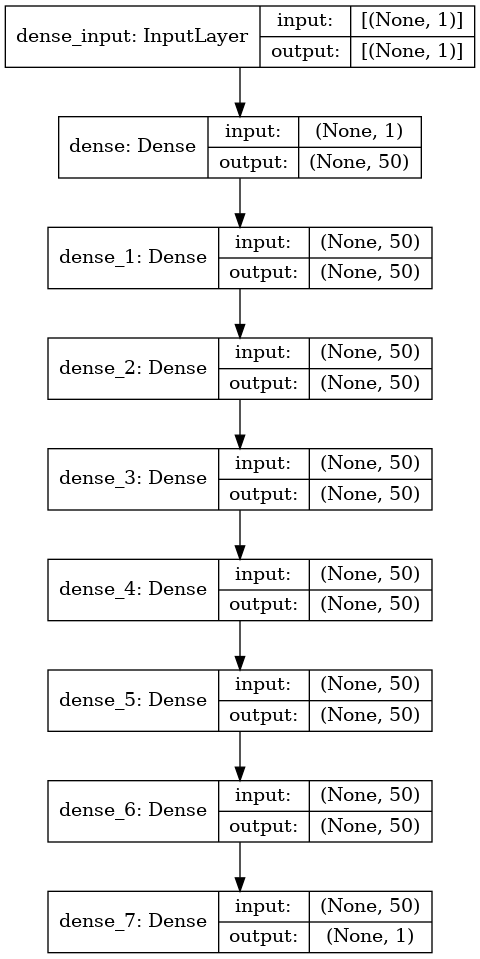

In [13]:
# Declaramos la red neuronal:
model = build_model(dim_feature , lr)

# Generamos un grafico sobre la arquitectura de la red:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='modelo.png', show_shapes = True)

In [14]:
# Entrenamos la red:   
training = model.fit(
    x_train,
    y_train,
    epochs=n_epochs,
    batch_size =n_batch_size,
    validation_data = (x_val, y_val),
    verbose=0 # 1 --> muestra el proceso de entrenamiento
)

In [15]:
# Extraemos las curvas de 'loss' y 'accuracy' para los datos de entrenamiento y validacion: 
loss_train_curve = training.history['loss']
accu_train_curve = training.history['mae']    

loss_valid_curve = training.history['val_loss']
accu_valid_curve = training.history['val_mae']

<Figure size 432x288 with 0 Axes>

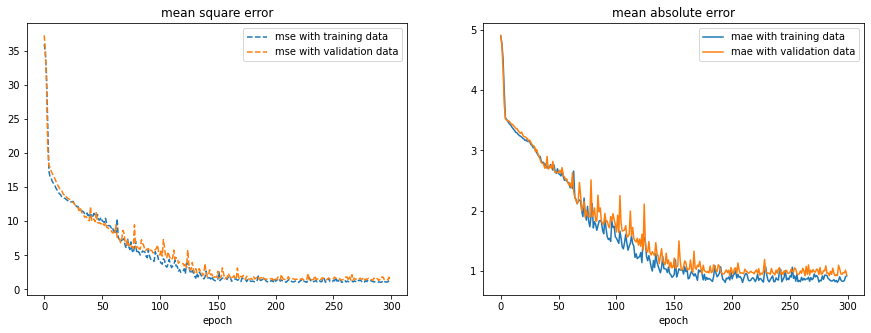

In [16]:
# Graficamos curvas:

# Eje x:
epoch = range( n_epochs )


plt.figure()
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(epoch, loss_train_curve, '--', label='mse with training data')
plt.plot(epoch, loss_valid_curve, '--', label='mse with validation data')
plt.legend()
plt.title('mean square error')
plt.xlabel('epoch')


plt.subplot(1,2,2)
plt.plot(epoch, accu_train_curve, label='mae with training data')
plt.plot(epoch, accu_valid_curve, label='mae with validation data')
plt.legend()
plt.title('mean absolute error')
plt.xlabel('epoch')
plt.show()

## Evaluamnos el modelo con los datos de prueba:

In [17]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 1.2502 - mae: 0.8715


[1.2502455711364746, 0.8715361952781677]

## Hacemos predicciones con el modelo entrenado (usando los datos de pruebas):

In [18]:
# Usamos los features de prueba para hacer una predicción:
y_test_pred = model.predict(x_test)
y_test_pred.shape

(200, 1)

In [19]:
# Desestandarizamos los features para graficar en el dominio real de los features:
x_test = x_std*x_test + x_mean

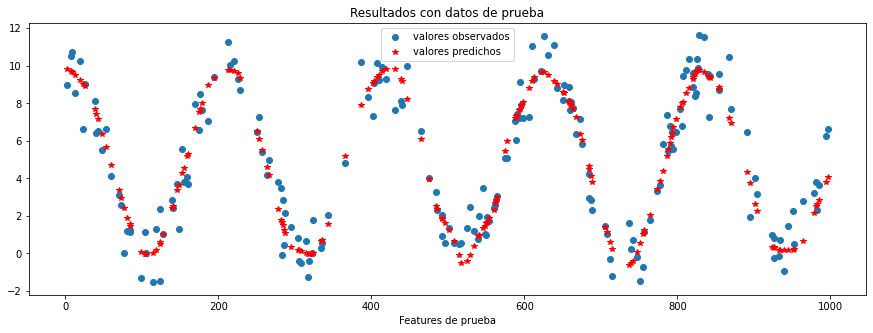

In [20]:
plt.figure( figsize=(15,5) )
plt.plot(x_test,y_test, 'o' , label = 'valores observados')
plt.plot(x_test,y_test_pred, '*r' ,label = 'valores predichos')
plt.title('Resultados con datos de prueba')
plt.legend()
plt.xlabel('Features de prueba')
plt.show()

## Hacemos predicciones con el modelo entrenado (usando todos los datos):

In [21]:
# Hacemos predicción usando todos los features:
y_labels_pred = model.predict(x_features)
y_labels_pred.shape

(1000, 1)

In [22]:
# Desestandarizamos los features para graficar en el dominio real de los features:
x_features = x_std*x_features + x_mean

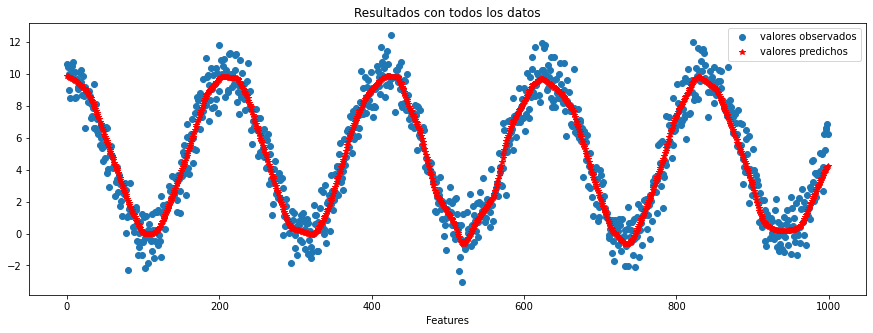

In [23]:
plt.figure( figsize=(15,5) )
plt.plot(x_features,y_labels, 'o' , label = 'valores observados')
plt.plot(x_features,y_labels_pred, '*r' ,label = 'valores predichos')
plt.title('Resultados con todos los datos')
plt.legend()
plt.xlabel('Features')
plt.show()

## Hacemos predicciones con el modelo entrenado (usando features fuera del dominio conocido)

En este ejemplo veremos que la regresión no lineal permite encontrar patrones no lineales dentro del dominio de features conocidos, sin embargo es imposible predecir dichos patrones. En este caso resulta mejor opción usar Redes Neuronales Recurrentes (RNN)

In [24]:
# Extraemos el último valor de los features
df_last = df['features'].values[-1]

n_pred = 100 # <--- Número de puntos a predecir
x_new = np.array( range(df_last, df_last +n_pred ) )
x_new

array([ 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009,
       1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020,
       1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031,
       1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042,
       1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053,
       1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064,
       1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075,
       1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086,
       1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097,
       1098])

In [25]:
# Ajustamos nuevos features para que puedan pasar por el modelo entrenado:

# Estandarizamos features usando la desviación y media de los features originales:
x_new = (x_new - x_mean)/x_std

In [26]:
x_new.shape

(100,)

In [27]:
# Redimensionamos features para que puedan pasar por el modelo entrenado:
x_new = x_new.reshape( x_new.shape[0] , 1 )

x_new.shape

(100, 1)

In [28]:
# Hacemos predicción usando los nuevos features:
y_new_pred = model.predict(x_new)
y_new_pred.shape

(100, 1)

In [29]:
# Desestandarizamos los features para graficar en el dominio real de los features:
x_new = x_std*x_new + x_mean

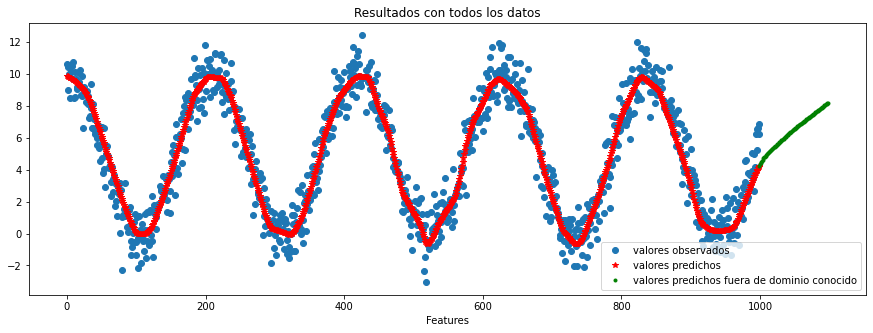

In [31]:
plt.figure( figsize=(15,5) )
plt.plot(x_features,y_labels, 'o' , label = 'valores observados')
plt.plot(x_features,y_labels_pred, '*r' ,label = 'valores predichos')
plt.plot(x_new,y_new_pred, '.g' , label = 'valores predichos fuera de dominio conocido')
plt.title('Resultados con todos los datos')
plt.legend()
plt.xlabel('Features')
plt.show()